In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine=load_wine()

In [4]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
df=pd.DataFrame(wine.data,columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
df["wine"]=wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
print("Rows and column of wine dataset",df.shape)
print(df.info())

Rows and column of wine dataset (178, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline               

In [8]:
df['wine'].value_counts()

1    71
0    59
2    48
Name: wine, dtype: int64

In [9]:
X=df.iloc[:,:-1]
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
y=df.iloc[:,-1]
y.tail()

173    2
174    2
175    2
176    2
177    2
Name: wine, dtype: int32

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [13]:
model_params={
       'GaussianNB':{
        'model':GaussianNB(),
        'param':{'var_smoothing': np.logspace(0,-9, num=100)
        
        }
    },
    'RandomForest':{
        'model':RandomForestClassifier(),
        'param':{'n_estimators':[1,5,10]
            
        }
    },
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{'criterion': ['gini', 'entropy'],
        'splitter':['best','random'],
        'max_depth': range(1,10)
        }
        
    },
    'SVM':{
        'model':SVC(gamma='auto'),
        'param':{'C':[1,10,20],
        'kernel':['rbf','linear']
            
        }
    }
   } 

In [14]:
scores=[]
for model_name,mp in model_params.items():
    mod_grid=GridSearchCV(mp['model'],mp['param'],cv=10,return_train_score=False)
    mod_grid.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':mod_grid.best_score_,
        'best_param':mod_grid.best_params_
    })

In [15]:
df=pd.DataFrame(scores,columns=['model','best_score','best_param'])
df

,model,best_score,best_param
0,GaussianNB,0.991667,{'var_smoothing': 5.336699231206313e-06}
1,RandomForest,0.958974,{'n_estimators': 10}
2,DecisionTreeClassifier,0.951282,"{'criterion': 'entropy', 'max_depth': 4, 'spli..."
3,SVM,0.933974,"{'C': 1, 'kernel': 'linear'}"


In [16]:
#From above GaussianNB seems best model among those model in this wine dataset

In [17]:
model=GaussianNB(var_smoothing=5.336699231206313e-06)

In [18]:
model.fit(X_train,y_train)

GaussianNB(var_smoothing=5.336699231206313e-06)

In [19]:
model.score(X_test,y_test)

0.9629629629629629

In [20]:
y_predicted=model.predict(X_test)

<AxesSubplot:title={'center':'Confusion Matrix_Heatmap'}>

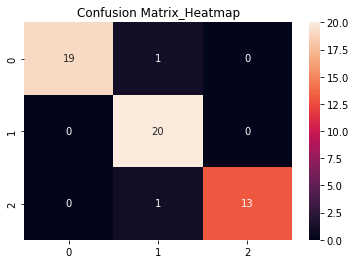

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
plt.title('Confusion Matrix_Heatmap')
sns.heatmap(cm,annot=True)

In [23]:
print("Classification Report")
print(classification_report(y_test,y_predicted))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.91      1.00      0.95        20
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

